# Cool Title: The Top 1000 Movies on IMDB
Caroline Cornett (crc91), Piper Epstein (pse3), Jason Ren (jr451), Athena Ru (ayr3), Amy Wang (yaw)

In [1]:
#import packages
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
sns.set_theme()

In [2]:
#read in data frame
movies = pd.read_csv("imdb_top_1000.csv")

## Data wrangling

In [3]:
#Dropping unecessary columns
movies = movies.drop(columns = ["Poster_Link"])
#Making Gross product a numerical variable
movies["Gross"] = movies["Gross"].str.replace(",", "").astype(float)
#Taking a look
movies.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0


There is an errorneous entry in the data. The released year for Apollo 13 is incorrect.

In [4]:
#Error in Released Year for Apollo 13
movies[movies["Released_Year"] == "PG"]

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
966,Apollo 13,PG,U,140 min,"Adventure, Drama, History",7.6,NASA must devise a strategy to return Apollo 1...,77.0,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,173837933.0


In [5]:
#Replace with correct Released Year
movies["Released_Year"] = movies["Released_Year"].replace(['PG'], 1995)
movies[movies["Series_Title"] == "Apollo 13"]

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
966,Apollo 13,1995,U,140 min,"Adventure, Drama, History",7.6,NASA must devise a strategy to return Apollo 1...,77.0,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,173837933.0


We create a new column `Decade` to bin `Released_Year` as we intend to create two time series of the meta score and IMDB rating of the most popular genres over time. This will ensure there are no gaps in the time series.

In [6]:
#Create Decade column
movies["Released_Year"] = movies["Released_Year"].astype(int)
movies["Decade"] = movies["Released_Year"] -  (movies["Released_Year"]%10)
movies[["Series_Title", "Released_Year", "Decade"]].head()

,Series_Title,Released_Year,Decade
0,The Shawshank Redemption,1994,1990
1,The Godfather,1972,1970
2,The Dark Knight,2008,2000
3,The Godfather: Part II,1974,1970
4,12 Angry Men,1957,1950


## Find the Unique Genres

In [7]:
unique_genre = set()

def genre_finder(x):
    for g in x["Genre"].split(", "): 
        unique_genre.add(g)

movies.apply(genre_finder, axis = 1)
unique_genre

{'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Drama',
 'Family',
 'Fantasy',
 'Film-Noir',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western'}

We create a dictionary where each key is a unique genre and the corresponding value is a dataframe consisting of movies listed under that genre. For example, `d["Comedy"]` below returns a dataframe with all the movies with `Comedy` in the `Genre`.

In [8]:
#Creating genre specific dataframes in dictionary d
d = {}
for genre in unique_genre: 
    d[genre] = movies[movies["Genre"].str.contains(genre)]
#checking code
print("Comedy df dimensions:  ", d["Comedy"].shape)
print("Comedy df:\n")
d["Comedy"]

Comedy df dimensions:   (233, 16)
Comedy df:



,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Decade
19,Gisaengchung,2019,A,132 min,"Comedy, Drama, Thriller",8.6,Greed and class discrimination threaten the ne...,96.0,Bong Joon Ho,Kang-ho Song,Lee Sun-kyun,Cho Yeo-jeong,Choi Woo-sik,552778,53367844.0,2010
26,La vita è bella,1997,U,116 min,"Comedy, Drama, Romance",8.6,When an open-minded Jewish librarian and his s...,59.0,Roberto Benigni,Roberto Benigni,Nicoletta Braschi,Giorgio Cantarini,Giustino Durano,623629,57598247.0,1990
35,The Intouchables,2011,UA,112 min,"Biography, Comedy, Drama",8.5,After he becomes a quadriplegic from a paragli...,57.0,Olivier Nakache,Éric Toledano,François Cluzet,Omar Sy,Anne Le Ny,760360,13182281.0,2010
47,Back to the Future,1985,U,116 min,"Adventure, Comedy, Sci-Fi",8.5,"Marty McFly, a 17-year-old high school student...",87.0,Robert Zemeckis,Michael J. Fox,Christopher Lloyd,Lea Thompson,Crispin Glover,1058081,210609762.0,1980
51,Modern Times,1936,G,87 min,"Comedy, Drama, Family",8.5,The Tramp struggles to live in modern industri...,96.0,Charles Chaplin,Charles Chaplin,Paulette Goddard,Henry Bergman,Tiny Sandford,217881,163245.0,1930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
984,The Muppet Movie,1979,U,95 min,"Adventure, Comedy, Family",7.6,Kermit and his newfound friends trek across Am...,74.0,James Frawley,Jim Henson,Frank Oz,Jerry Nelson,Richard Hunt,32802,76657000.0,1970
989,The Long Goodbye,1973,A,112 min,"Comedy, Crime, Drama",7.6,Private investigator Philip Marlowe helps a fr...,87.0,Robert Altman,Elliott Gould,Nina van Pallandt,Sterling Hayden,Mark Rydell,26337,959000.0,1970
991,Kelly's Heroes,1970,GP,144 min,"Adventure, Comedy, War",7.6,A group of U.S. soldiers sneaks across enemy l...,50.0,Brian G. Hutton,Clint Eastwood,Telly Savalas,Don Rickles,Carroll O'Connor,45338,1378435.0,1970
994,A Hard Day's Night,1964,U,87 min,"Comedy, Music, Musical",7.6,"Over two ""typical"" days in the life of The Bea...",96.0,Richard Lester,John Lennon,Paul McCartney,George Harrison,Ringo Starr,40351,13780024.0,1960


## Create new column `num_genres`
`num_genres` is the number of genres listed in `Genre`. For instance, `The Godfather` is listed under Crime and Drama so the corresponding value in `num_genres` is 2.

In [9]:
def num_genre(x):
    return len(x["Genre"].split(", "))

movies["num_genres"] = movies.apply(num_genre, axis=1).astype('int')
movies.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Decade,num_genres
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0,1990,1
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,1970,2
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0,2000,3
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0,1970,2
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0,1950,2


## EDA

We count the number of movies in each `Genre`.

In [10]:
genre_count = movies.groupby("Genre")["Genre"].count().to_frame(name="Count")
genre_count.sort_values(by = "Count", ascending=False).head(10)

,Count
Genre,
Drama,85
"Drama, Romance",37
"Comedy, Drama",35
"Comedy, Drama, Romance",31
"Action, Crime, Drama",30
"Crime, Drama, Thriller",28
"Biography, Drama, History",28
"Crime, Drama, Mystery",27
"Crime, Drama",26


We calculate summary statisitcs for each unique genre by metascore, gross, and IMDB rating.

In [11]:
import pprint
#summary statistics for each genre, by success metrics

# TO DO-> round the values so less busy?

#Meta_score
avg_metascore = {}
for genre in unique_genre:
    avg_metascore[genre] = np.mean(d[genre]["Meta_score"])
avg_metascore = sorted(avg_metascore.items(), key=lambda x:x[1], reverse=True)
print("Average metascores, by genre: \n")
pprint.pprint(avg_metascore)
print()
#Gross

avg_gross = {}
for genre in unique_genre:
    avg_gross[genre] = np.mean(d[genre]["Gross"])
avg_gross = sorted(avg_gross.items(), key=lambda x:x[1], reverse=True)
print("Average gross product, by genre: \n")
pprint.pprint(avg_gross)
print()
#IMDB_Rating
avg_IMDB = {}
for genre in unique_genre:
    avg_IMDB[genre] = np.mean(d[genre]["IMDB_Rating"])
avg_IMDB = sorted(avg_IMDB.items(), key=lambda x:x[1], reverse=True)
print("Average IMDB scores, by genre: \n")
pprint.pprint(avg_IMDB)



Average metascores, by genre: 

[('Film-Noir', 93.72727272727273),
 ('Western', 83.1),
 ('Horror', 81.55555555555556),
 ('Romance', 81.27884615384616),
 ('Animation', 81.09333333333333),
 ('War', 80.28888888888889),
 ('History', 79.22916666666667),
 ('Mystery', 78.7625),
 ('Drama', 78.04),
 ('Adventure', 78.00555555555556),
 ('Comedy', 77.95744680851064),
 ('Musical', 77.91666666666667),
 ('Family', 77.88),
 ('Thriller', 76.91525423728814),
 ('Music', 76.76315789473684),
 ('Sci-Fi', 76.59677419354838),
 ('Fantasy', 76.34482758620689),
 ('Biography', 76.31958762886597),
 ('Crime', 75.41420118343196),
 ('Action', 73.76923076923077),
 ('Sport', 72.52941176470588)]

Average gross product, by genre: 

[('Adventure', 165731278.64117646),
 ('Sci-Fi', 148026397.04918033),
 ('Action', 141239282.89102563),
 ('Animation', 127967528.46268657),
 ('Fantasy', 108616841.91071428),
 ('Family', 92932656.91666667),
 ('Comedy', 64125296.22513089),
 ('Thriller', 58676626.64545455),
 ('History', 55539532.06

We grouped movies by `num_genres` and calculated the count, mean meta score, median gross earnings, and mean IMDB rating. There are more movies with 3 genres listed than movies with 1 and 2 genres listed combined.

In [12]:
movies.groupby("num_genres")["num_genres"].count()

movies.groupby('num_genres').aggregate({'num_genres': 'count', 
                                        'Meta_score': 'mean', 
                                        'Gross': 'median', 
                                        'IMDB_Rating': 'mean'})

,num_genres,Meta_score,Gross,IMDB_Rating
num_genres,,,,
1,105,78.177778,7098492.0,7.967619
2,249,80.044335,20395934.0,7.978715
3,646,77.172727,29400000.0,7.934985


Some more general exploration.

In [13]:
#general exploration
war_df = d["War"]
western_df = d["Western"]
filmnoir_df = d["Film-Noir"]
horror_df = d["Horror"]
scifi_df = d["Sci-Fi"]
romance_df = d["Romance"]
print(war_df.shape)
print(western_df.shape)
print(filmnoir_df.shape)
print(horror_df.shape)
print(scifi_df.shape)
print(romance_df.shape)

(51, 16)
(20, 16)
(19, 16)
(32, 16)
(67, 16)
(125, 16)


Distributions of some movie genres by IMDB Rating.

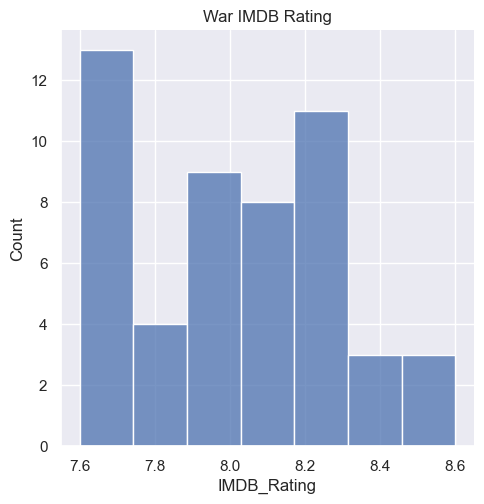

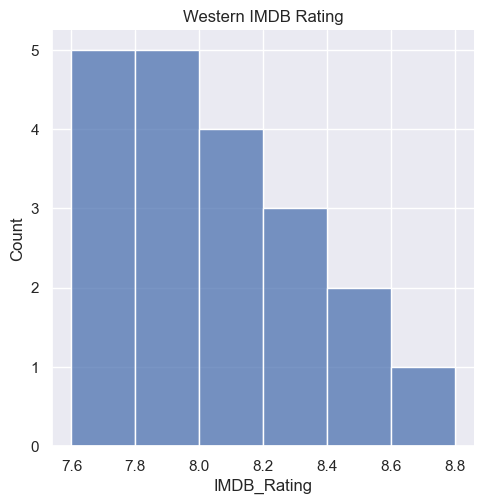

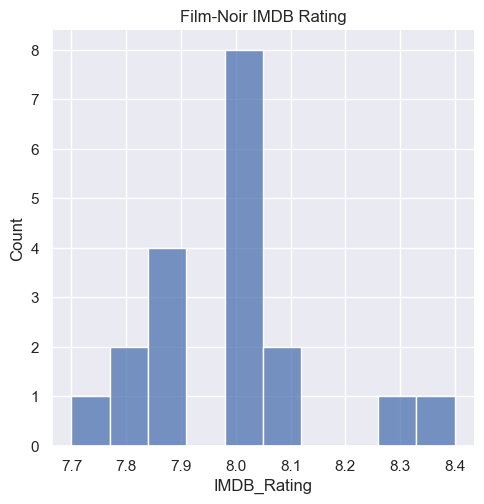

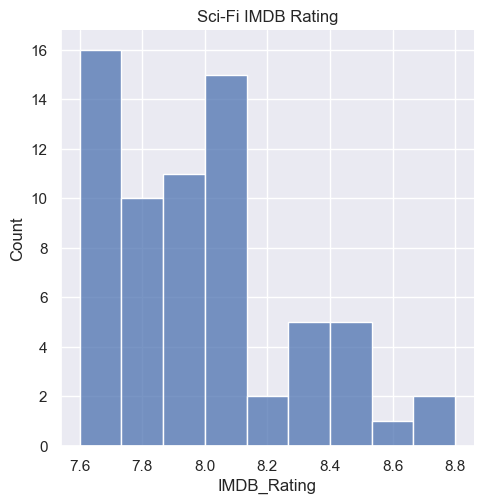

In [14]:
#IMDB top 4
sns.displot(war_df, x = "IMDB_Rating").set(title = "War IMDB Rating")
sns.displot(western_df, x = "IMDB_Rating").set(title = "Western IMDB Rating")
sns.displot(filmnoir_df, x = "IMDB_Rating").set(title = "Film-Noir IMDB Rating")
sns.displot(scifi_df, x = "IMDB_Rating").set(title = "Sci-Fi IMDB Rating")
plt.show()

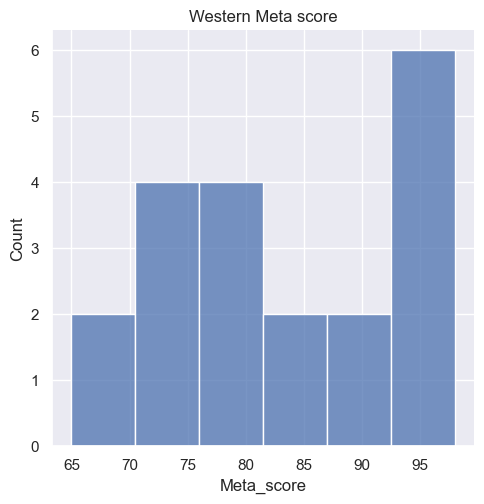

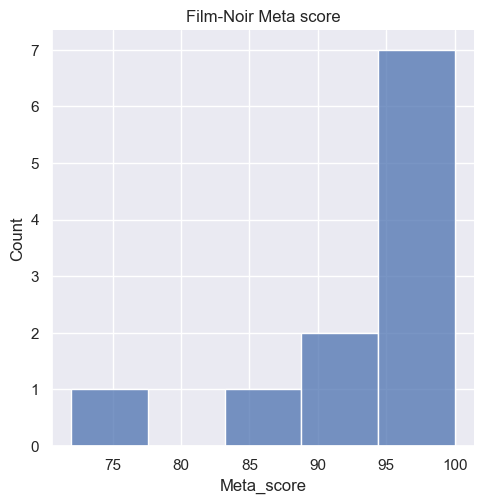

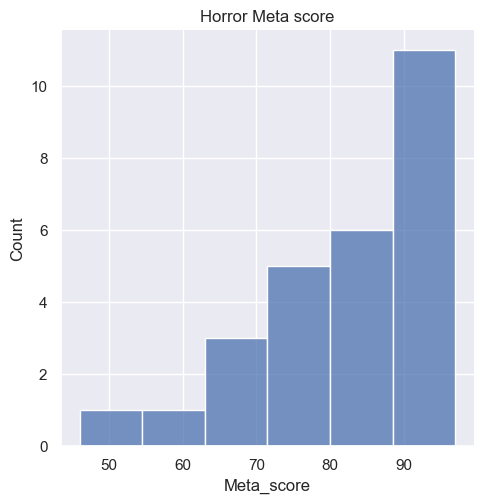

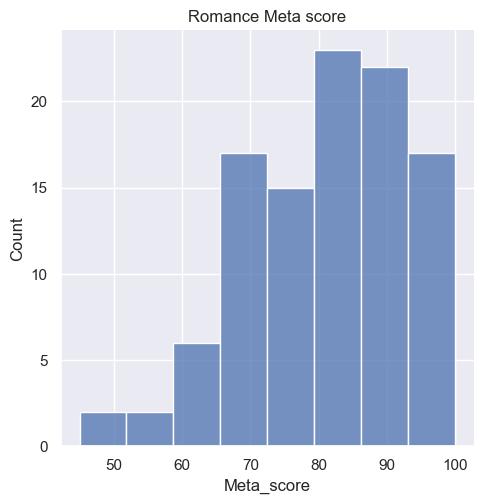

In [15]:
#meta top 4
sns.displot(western_df, x = "Meta_score").set(title = "Western Meta score")
sns.displot(filmnoir_df, x = "Meta_score").set(title = "Film-Noir Meta score")
sns.displot(horror_df, x = "Meta_score").set(title = "Horror Meta score")
sns.displot(romance_df, x = "Meta_score").set(title = "Romance Meta score")
plt.show()

## Data Analysis

### 95% CI for IMDB Rating
We create 95% confidence intervals for the IMDB Rating of the top 4 unique genres as determined by their average IMDB score. These are `War`, `Western`, `Film-Noir`, and `Sci-Fi`.

In [16]:
n_war = war_df.shape[0]
n_western = western_df.shape[0]
n_filmnoir = filmnoir_df.shape[0]
n_scifi = scifi_df.shape[0]

#war
std_warIMDB = np.std(war_df["IMDB_Rating"])
mean_warIMDB = np.mean(war_df["IMDB_Rating"])
scale_warIMDB = std_warIMDB / np.sqrt(n_war)
ci_warIMDB = stats.t.interval(0.95, df=n_war-1, loc=mean_warIMDB, scale=scale_warIMDB)

#western
std_westernIMDB = np.std(western_df["IMDB_Rating"])
mean_westernIMDB = np.mean(western_df["IMDB_Rating"])
scale_westernIMDB = std_westernIMDB / np.sqrt(n_western)
ci_westernIMDB = stats.t.interval(0.95, df=n_western-1, loc=mean_westernIMDB, scale=scale_westernIMDB)

#filmnoir
std_filmnoirIMDB = np.std(filmnoir_df["IMDB_Rating"])
mean_filmnoirIMDB = np.mean(filmnoir_df["IMDB_Rating"])
scale_filmnoirIMDB = std_filmnoirIMDB / np.sqrt(n_filmnoir)
ci_filmnoirIMDB = stats.t.interval(0.95, df=n_filmnoir-1, loc=mean_filmnoirIMDB, scale=scale_filmnoirIMDB)

#scifi
std_scifiIMDB = np.std(scifi_df["IMDB_Rating"])
mean_scifiIMDB = np.mean(scifi_df["IMDB_Rating"])
scale_scifiIMDB = std_scifiIMDB / np.sqrt(n_scifi)
ci_scifiIMDB = stats.t.interval(0.95, df=n_scifi-1, loc=mean_scifiIMDB, scale=scale_scifiIMDB)

print("War: ", ci_warIMDB)
print("Western: ", ci_westernIMDB)
print("Film-Noir: ", ci_filmnoirIMDB)
print("Sci-Fi: ", ci_scifiIMDB)

War:  (7.936145048116572, 8.091305932275585)
Western:  (7.852000849794134, 8.147999150205862)
Film-Noir:  (7.9130333706288365, 8.06591399779222)
Sci-Fi:  (7.908259043288106, 8.046964837308908)


Because all confidence interval overlap around the mean rating of 7.9 to 8.1, we cannot claim there is a statistically significant difference in mean IMDB rating for the top four rated movies War, Western, Film-Noir, and Sci-Fi.

### 95% CI for Meta Score
We create 95% confidence intervals for the Meta scores of the top 4 unique genres as determined by their average Metascore. These are `Film-Noir`, `Western`, `Horror`, and `Romance`.

In [17]:
#confidence interval for metascore top 4

n_filmnoir = filmnoir_df.shape[0]
n_western = western_df.shape[0]
n_horror = horror_df.shape[0]
n_romance = romance_df.shape[0]


#filmnoir
std_filmnoirMeta = np.std(filmnoir_df["Meta_score"])
mean_filmnoirMeta = np.mean(filmnoir_df["Meta_score"])
scale_filmnoirMeta = std_filmnoirMeta / np.sqrt(n_filmnoir)
ci_filmnoirMeta = stats.t.interval(0.95, df=n_filmnoir-1, loc=mean_filmnoirMeta, scale=scale_filmnoirMeta)


#western
std_westernMeta = np.std(western_df["Meta_score"])
mean_westernMeta = np.mean(western_df["Meta_score"])
scale_westernMeta = std_westernMeta / np.sqrt(n_western)
ci_westernMeta = stats.t.interval(0.95, df=n_western-1, loc=mean_westernMeta, scale=scale_westernMeta)


#horror
std_horrorMeta = np.std(horror_df["Meta_score"])
mean_horrorMeta = np.mean(horror_df["Meta_score"])
scale_horrorMeta = std_horrorMeta / np.sqrt(n_horror)
ci_horrorMeta = stats.t.interval(0.95, df=n_horror-1, loc=mean_horrorMeta, scale=scale_horrorMeta)


#romance
std_romanceMeta = np.std(romance_df["Meta_score"])
mean_romanceMeta = np.mean(romance_df["Meta_score"])
scale_romanceMeta = std_filmnoirMeta / np.sqrt(n_filmnoir)
ci_romanceMeta = stats.t.interval(0.95, df=n_romance-1, loc=mean_romanceMeta, scale=scale_romanceMeta)


print("Film-Noir: ", ci_filmnoirMeta)
print("Western: ", ci_westernMeta)
print("Horror: ", ci_horrorMeta)
print("Romance: ", ci_romanceMeta)

Film-Noir:  (89.98202727389172, 97.47251818065375)
Western:  (78.52182384535494, 87.67817615464504)
Horror:  (77.19767967354909, 85.91343143756202)
Romance:  (77.75044780512052, 84.8072445025718)


All confidence intervals overlap except for Film-Noir's 95% confidence interval for mean meta score (90.0, 97.4), which is higher than the 95% confidence intervals for Western, Horror, and Romance which fall around 76.7 to 85.9). This difference could be due to a lack of data points for Film-Noir and should be treated with caution.

### Hypothesis Testing

In [18]:
# separating into different datasets
less_three = movies[movies["num_genres"] <=2]
three = movies[movies["num_genres"] == 3]
print(less_three["IMDB_Rating"].mean())

7.9754237288135394


#### Is the mean `IMDB_Rating` of movies with less than 3 genres different from that of movies with three genres listed?

In [19]:
stats.ttest_ind(less_three["IMDB_Rating"], three["IMDB_Rating"], equal_var = False)

Ttest_indResult(statistic=2.1786709099349983, pvalue=0.02969681970529208)

In [20]:
less_three = less_three.dropna(subset = ["Meta_score", "Gross"])
three = three.dropna(subset = ["Meta_score", "Gross"])
#print(less_three.shape[0])

#### Is the mean `Meta_score` of movies with less than 3 genres different from that of movies with three genres listed?

In [21]:
stats.ttest_ind(less_three["Meta_score"], three["Meta_score"], equal_var = False)

Ttest_indResult(statistic=1.7446848475622008, pvalue=0.08161731700877578)

#### Is the mean `Gross` of movies with less than 3 genres different from that of movies with three genres listed?

In [22]:
stats.ttest_ind(less_three["Gross"], three["Gross"], equal_var = False)

Ttest_indResult(statistic=-4.191877655151894, pvalue=3.117372598948984e-05)

Assuming two-sided test: Null Hypothesis - There is no significant difference in IMDB_Rating/Meta_score/Gross between movies with 3 genres listed and movies with less than 3 genres listed. Alternative Hypothesis - There is a significant difference in IMDB_Rating/Meta_score/Gross between movies with 3 genres listed and movies with less than 3 genres listed.

Results: IMDB_Rating - Since the pvalue of 0.030 is less than our alpha value of 0.05, we have convincing evidence that the mean IMDB_Rating of movies with less than 3 genres listed is significantly different from the mean IMDB_Rating of movies with 3 genres listed. More specifically, since the test statistic is positive, we can further conclude that the mean IMDB_Rating of movies with less than 3 genres listed is significantly higher than the mean IMDB_Rating of movies with 3 genres listed.

Meta_score - Since the pvalue of 0.082 is less than our alpha value of 0.05, we have convincing evidence that the mean Meta_score of movies with less than 3 genres listed is significantly different from the mean Meta_score of movies with 3 genres listed. More specifically, since the test statistic is positive, we can further conclude that the mean Meta_score of movies with less than 3 genres listed is significantly higher than the mean Meta_score of movies with 3 genres listed.

Gross - Since the pvalue of 3.117e-05 is less than our alpha value of 0.05, we have convincing evidence that the mean Gross of movies with less than 3 genres listed is significantly different from the mean Gross of movies with 3 genres listed. More specifically, since the test statistic is negative, we can further conclude that the mean Gross of movies with less than 3 genres listed is significantly lower than the mean Gross of movies with 3 genres listed.

Our results imply that movies with 3 genres listed may attract the attention of more people, as the mean Gross of movies with 3 genres listed is significantly higher than the mean Gross of movies with less than 3 genres listed. However, this doesn't necessarily mean that movies with 3 genres listed are better. In fact, our results show that movies with less than 3 genres listed have both a significantly higher mean IMDB_Rating and a significantly higher mean Meta_score compared to movies with 3 genres listed. In other words, movies with 3 genres may be trying to cater to too many people, and while they attract the attention of many people, they're of lesser quality compared to movies that focus on less than 3 genres.

### Top 4 Genres by Average Meta Score Over the Decades

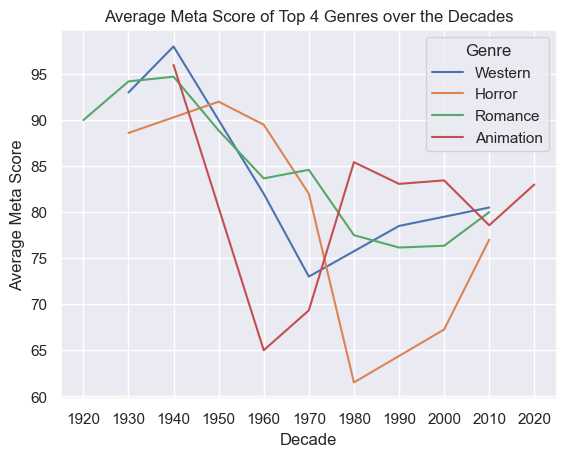

In [23]:
avg_meta_western = d["Western"].groupby("Decade", as_index = False)["Meta_score"].mean()
avg_meta_horror = d["Horror"].groupby("Decade", as_index = False)["Meta_score"].mean()
avg_meta_romance = d["Romance"].groupby("Decade", as_index = False)["Meta_score"].mean()
avg_meta_animation = d["Animation"].groupby("Decade", as_index = False)["Meta_score"].mean()

ax = avg_meta_western.plot(x='Decade', y='Meta_score')
avg_meta_horror.plot(ax=ax, x='Decade', y='Meta_score')
avg_meta_romance.plot(ax=ax, x='Decade', y='Meta_score')
avg_meta_animation.plot(ax=ax, x='Decade', y='Meta_score')
plt.ylabel("Average Meta Score")
plt.legend(labels=["Western", "Horror", "Romance", "Animation"], title="Genre")
plt.title("Average Meta Score of Top 4 Genres over the Decades")
plt.xticks(np.arange(1920, 2020+1, 10))
plt.show()

In [24]:
### Top 4 Genres by Median Meta Score Over the Decades

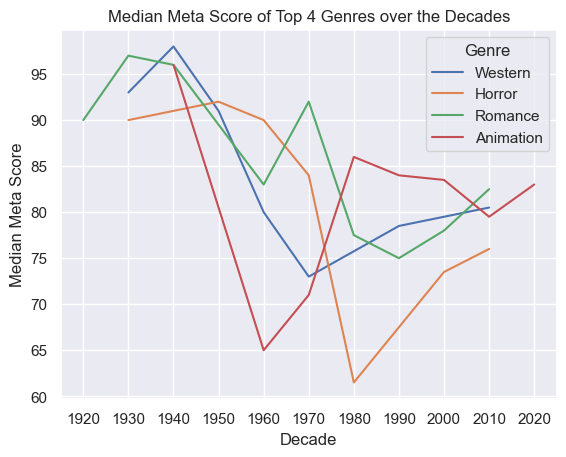

In [25]:
med_meta_western = d["Western"].groupby("Decade", as_index = False)["Meta_score"].median()
med_meta_horror = d["Horror"].groupby("Decade", as_index = False)["Meta_score"].median()
med_meta_romance = d["Romance"].groupby("Decade", as_index = False)["Meta_score"].median()
med_meta_animation = d["Animation"].groupby("Decade", as_index = False)["Meta_score"].median()

ax = med_meta_western.plot(x='Decade', y='Meta_score')
med_meta_horror.plot(ax=ax, x='Decade', y='Meta_score')
med_meta_romance.plot(ax=ax, x='Decade', y='Meta_score')
med_meta_animation.plot(ax=ax, x='Decade', y='Meta_score')
plt.ylabel("Median Meta Score")
plt.legend(labels=["Western", "Horror", "Romance", "Animation"], title="Genre")
plt.title("Median Meta Score of Top 4 Genres over the Decades")
plt.xticks(np.arange(1920, 2020+1, 10))
plt.show()

In [26]:
### Top 4 Genres by Average IMDB Rating Over the Decades

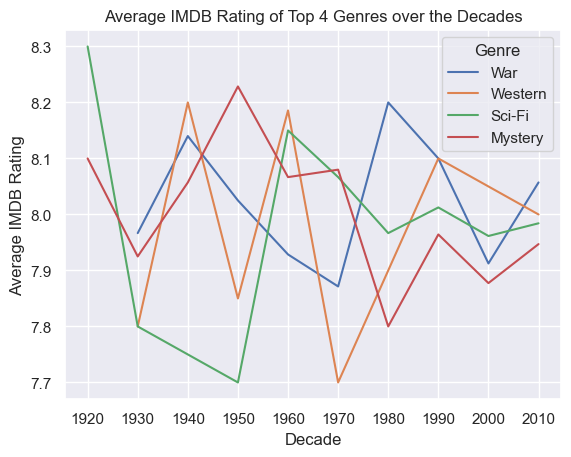

In [27]:
avg_imdb_war = d["War"].groupby("Decade", as_index = False)["IMDB_Rating"].mean()
avg_imdb_western = d["Western"].groupby("Decade", as_index = False)["IMDB_Rating"].mean()
avg_imdb_scifi = d["Sci-Fi"].groupby("Decade", as_index = False)["IMDB_Rating"].mean()
avg_imdb_mystery = d["Mystery"].groupby("Decade", as_index = False)["IMDB_Rating"].mean()

ax = avg_imdb_war.plot(x='Decade', y='IMDB_Rating')
avg_imdb_western.plot(ax=ax, x='Decade', y='IMDB_Rating')
avg_imdb_scifi.plot(ax=ax, x='Decade', y='IMDB_Rating')
avg_imdb_mystery.plot(ax=ax, x='Decade', y='IMDB_Rating')
plt.ylabel("Average IMDB Rating")
plt.legend(labels=["War", "Western", "Sci-Fi", "Mystery"], title="Genre")
plt.title("Average IMDB Rating of Top 4 Genres over the Decades")
plt.xticks(np.arange(1920, 2010+1, 10))
plt.show()

### Top 4 Genres by Median IMDB Rating Over the Decades

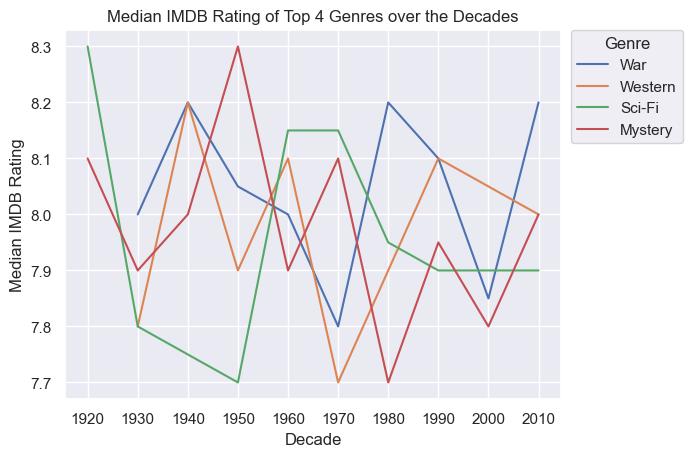

In [28]:
med_imdb_war = d["War"].groupby("Decade", as_index = False)["IMDB_Rating"].median()
med_imdb_western = d["Western"].groupby("Decade", as_index = False)["IMDB_Rating"].median()
med_imdb_scifi = d["Sci-Fi"].groupby("Decade", as_index = False)["IMDB_Rating"].median()
med_imdb_mystery = d["Mystery"].groupby("Decade", as_index = False)["IMDB_Rating"].median()

ax = med_imdb_war.plot(x='Decade', y='IMDB_Rating')
med_imdb_western.plot(ax=ax, x='Decade', y='IMDB_Rating')
med_imdb_scifi.plot(ax=ax, x='Decade', y='IMDB_Rating')
med_imdb_mystery.plot(ax=ax, x='Decade', y='IMDB_Rating')
plt.ylabel("Median IMDB Rating")
plt.legend(labels=["War", "Western", "Sci-Fi", "Mystery"], 
           title="Genre", 
           bbox_to_anchor=(1.02, 1), 
           loc='upper left', borderaxespad=0)
plt.title("Median IMDB Rating of Top 4 Genres over the Decades")
plt.xticks(np.arange(1920, 2010+1, 10))
plt.show()